In [13]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt

In [14]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

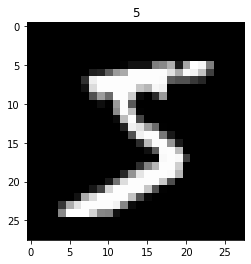

In [15]:
plt.imshow(x_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

In [16]:
x_train.shape, y_train.shape, x_test.shape, y_train.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

In [17]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [19]:
x_train[0].dtype

dtype('uint8')

In [20]:
x_train, x_test = x_train / 255.0, x_test /255.0

In [21]:
x_train.dtype, y_train.dtype

(dtype('float64'), dtype('uint8'))

In [ ]:
# Sequential Model
model = tf.keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [22]:
# subclass Model
class MnistModel(tf.keras.Model):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.flatten = keras.layers.Flatten()
        self.d1 = keras.layers.Dense(128, activation='relu')
        self.d2 = keras.layers.Dense(10, activation='softmax')
        
    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        y = self.d2(x)
        return y
    
model = MnistModel()

In [23]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

In [24]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), validation_freq=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2629 - sparse_categorical_accuracy: 0.9240 - val_loss: 0.1482 - val_sparse_categorical_accuracy: 0.9541
Epoch 2/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1175 - sparse_categorical_accuracy: 0.9653 - val_loss: 0.0994 - val_sparse_categorical_accuracy: 0.9691
Epoch 3/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0800 - sparse_categorical_accuracy: 0.9764 - val_loss: 0.0865 - val_sparse_categorical_accuracy: 0.9727
Epoch 4/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0598 - sparse_categorical_accuracy: 0.9812 - val_loss: 0.0911 - val_sparse_categorical_accuracy: 0.9716
Epoch 5/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0454 - sparse_categorical_accuracy: 0.9860 - val_loss: 0.0781 - val_sparse_categorical_accuracy: 0.9757
Epoch 6/10
6000

In [25]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  100480    
_________________________________________________________________
dense_3 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
